In [ ]:
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)


In [3]:
df = pd.read_csv("D:/gitrepos/gene-disease-gnn/results/multitask/807/0_807_aux_cosine_epoch.csv", sep=",")

In [4]:
# df.weight = df.weight.str.split('(').str[1].str.split(',').str[0].astype(float)

In [5]:
df_cos = df.pivot_table(
    index="epoch",
    columns="aux_idx",
    values=["cos", "weight"],
    aggfunc="min"
)

In [72]:
w_df = df_cos.weight
c_df = df_cos.cos

In [ ]:
w_df[50] = w_df[50].apply(ast.literal_eval)
w_expanded = pd.DataFrame(w_df[50].tolist())

C:\Users\Nemes\AppData\Local\Temp\ipykernel_9192\3890179065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_df[50] = w_df[50].apply(ast.literal_eval)


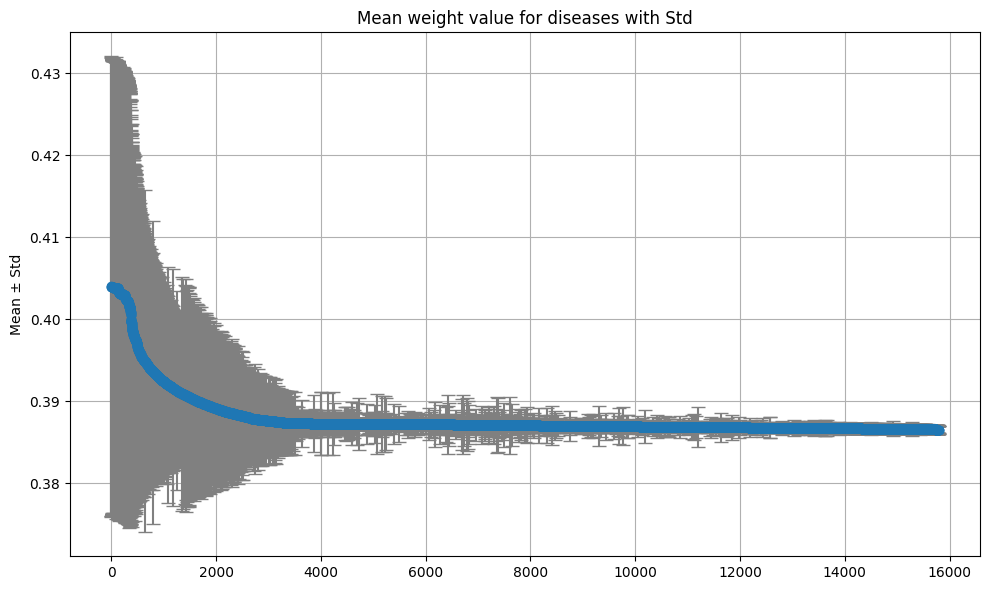

In [58]:
col_mean = w_expanded.mean()
col_std = w_expanded.std()

# Sort the means descendingly
col_mean_sorted = col_mean.sort_values(ascending=False)
col_std_sorted = col_std[col_mean_sorted.index] 

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=range(len(col_mean_sorted)),       # numeric x-axis
    y=col_mean_sorted.values,            # mean values
    yerr=col_std_sorted.values,          # std as error bars
    fmt='o',                             # point marker
    ecolor='gray',                       # error bar color
    capsize=5                            # small horizontal line on error bar
)

plt.ylabel("Mean ± Std")
plt.title("Mean weight value for diseases with Std")
plt.grid(True)
plt.tight_layout()
plt.show()

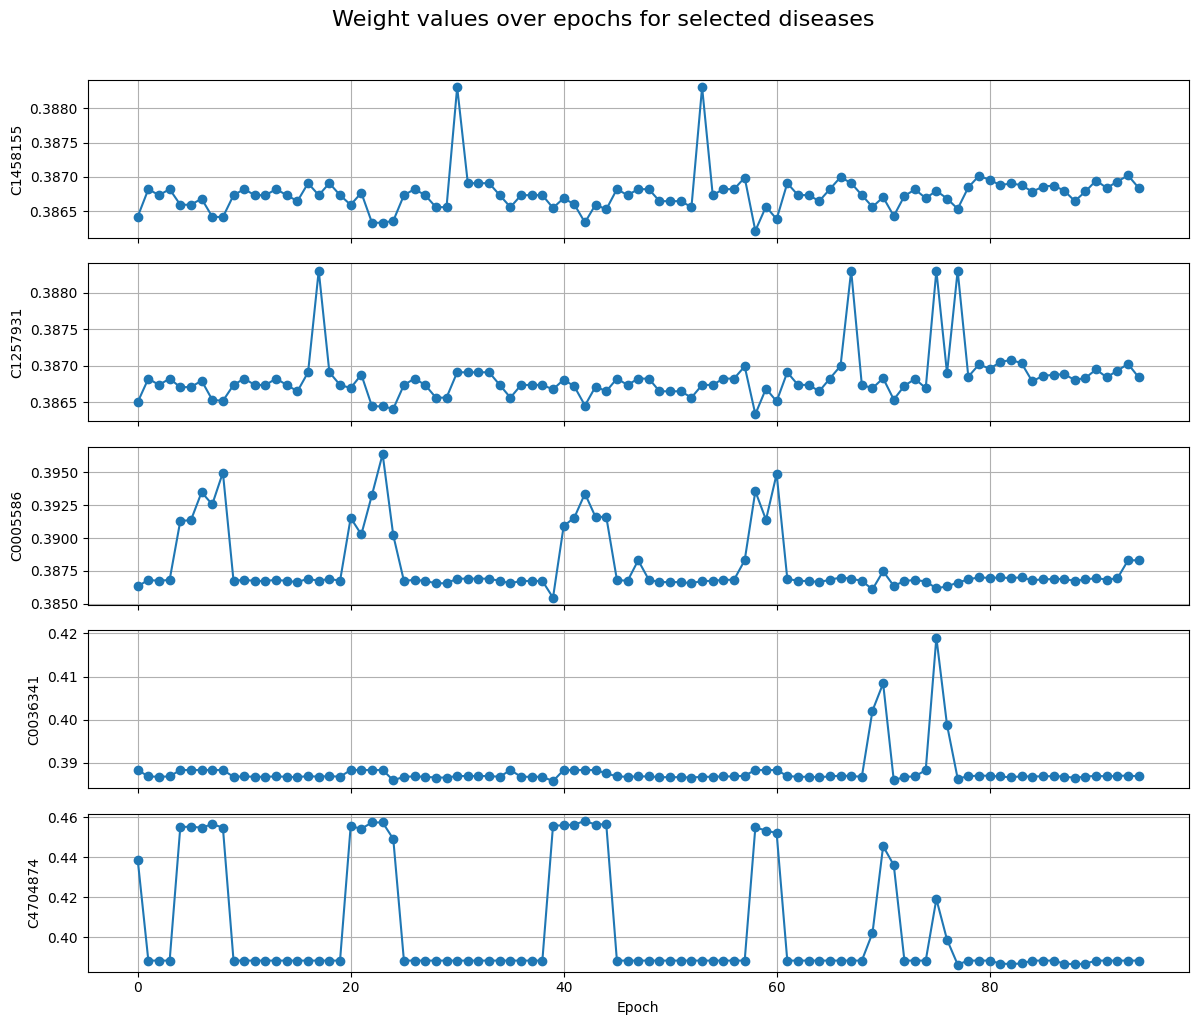

In [81]:
w_used = w_expanded[[1004, 959, 50, 383, 1173]]
diseases = ["C1458155", "C1257931", "C0005586", "C0036341", "C4704874"]

fig, axes = plt.subplots(len(w_used.columns), 1, figsize=(12, 2*len(w_used.columns)), sharex=True)
fig.suptitle("Weight values over epochs for selected diseases", fontsize=16, y=1.02)

for ax, col, d in zip(axes, w_used.columns, diseases):
    ax.plot(w_used.index, w_used[col], marker='o')
    ax.set_ylabel(f"{d}")
    ax.grid(True)

axes[-1].set_xlabel("Epoch")
plt.tight_layout()
plt.show()

In [74]:
df_cos["c_std"] = df_cos["cos"].std(axis=1)
df_cos["c_mean"] = df_cos["cos"].mean(axis=1)

In [75]:
df_cos["cos"].mean(), df_cos["cos"].std()

(aux_idx
 50      0.436139
 383     0.513056
 959     0.744363
 1004    0.735928
 1173    0.752141
 dtype: float64,
 aux_idx
 50      0.803840
 383     0.789776
 959     0.590711
 1004    0.595832
 1173    0.576932
 dtype: float64)

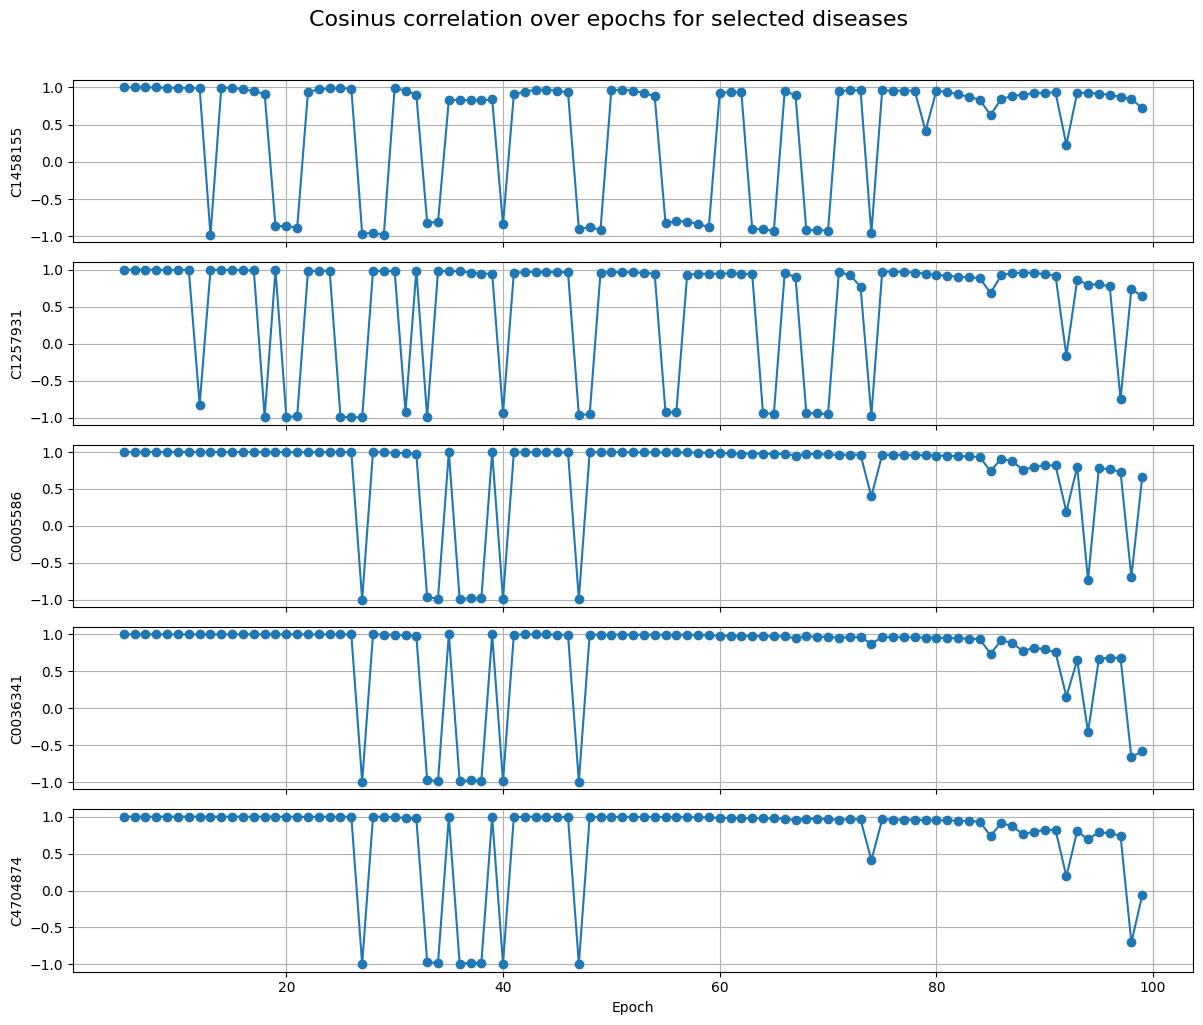

In [82]:
c_used = c_df
diseases = ["C1458155", "C1257931", "C0005586", "C0036341", "C4704874"]

fig, axes = plt.subplots(len(w_used.columns), 1, figsize=(12, 2*len(w_used.columns)), sharex=True)
fig.suptitle("Cosinus correlation over epochs for selected diseases", fontsize=16, y=1.02)

for ax, col, d in zip(axes, df_cos["cos"], diseases):
    ax.plot(df_cos["cos"].index, df_cos["cos"][col], marker='o')
    ax.set_ylabel(f"{d}")
    ax.grid(True)

axes[-1].set_xlabel("Epoch")
plt.tight_layout()
plt.show()